Importing necessary modules

In [71]:
import pandas as pd
import numpy as np
import geopandas as gpd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data and making new dataframe dat_num 

In [107]:
data = pd.read_csv("Ecommerce Customers.csv")
#print(data.head())
display(data.head())

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]


Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [73]:
#data.describe()
#data.info()

In [74]:
#data.isnull().sum() #Überprüfung auf fehlende Werte je Spalte 

Adress analysis

In [75]:
list_shortcut_states = ["AK","AL","AR","AZ","CA","CO","CT","DE","FL","GA","HI","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY"]
state_list = []

for i in data["Address"]:
    if "Box" in i:
        index_to_drop = data[data["Address"] == i].index.values 
        data.drop(index_to_drop, inplace = True)
    else:
        state = i.split(",")[-1].split()[0]

        if state in list_shortcut_states:
            state_list.append(state)
        else:
            index_to_drop = data[data["Address"] == i].index.values 
            data.drop(index_to_drop, inplace = True)


data.drop(["Email","Avatar","Address"], inplace = True, axis = 1)
data.insert(5, "State", state_list)

data_mixed = data
data_mixed.index = range(len(data_mixed.index))

print(data_mixed.info())
#print(data_mixed.State.value_counts())
#display(data_mixed.State.value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   393 non-null    float64
 1   Time on App           393 non-null    float64
 2   Time on Website       393 non-null    float64
 3   Length of Membership  393 non-null    float64
 4   Yearly Amount Spent   393 non-null    float64
 5   State                 393 non-null    object 
dtypes: float64(5), object(1)
memory usage: 18.5+ KB
None


Distribution of customers among the states

  STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD          ALAND  \
0      02  01785533  0400000US02    02     AK      Alaska   00  1477946266785   
1      01  01779775  0400000US01    01     AL     Alabama   00   131173688951   
2      05  00068085  0400000US05    05     AR    Arkansas   00   134771517596   
3      04  01779777  0400000US04    04     AZ     Arizona   00   294198560125   
4      06  01779778  0400000US06    06     CA  California   00   403501101370   

         AWATER                                           geometry  Customers  
0  245390495931  MULTIPOLYGON (((-133.65582 55.62562, -133.6249...          7  
1    4593686489  MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...          9  
2    2960191698  POLYGON ((-94.61792 36.49941, -94.55929 36.499...          6  
3    1027346486  POLYGON ((-114.79968 32.59362, -114.80939 32.6...          9  
4   20466718403  MULTIPOLYGON (((-118.60337 33.47810, -118.5987...          6  


<AxesSubplot:>

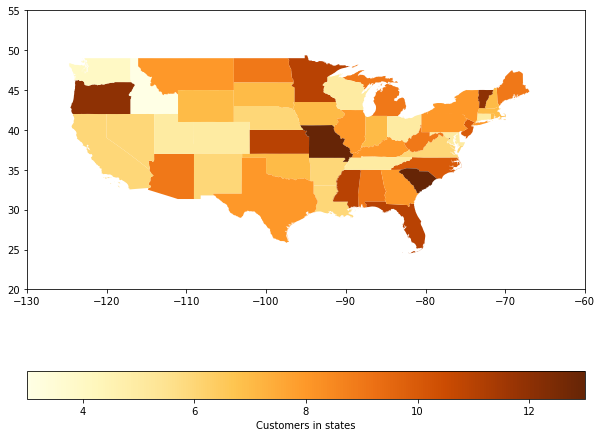

In [76]:
states_and_customers_list = data_mixed.State.value_counts()

states = gpd.read_file("cb_2016_us_state_5m\cb_2016_us_state_5m.shp")
#print(states.head(10))

geos_to_drop = [26,29,51,52,53,54]
states.drop(geos_to_drop, inplace=True)


states_50 = states
states_50.index = range(len(states_50.index))

states_50.sort_values('STUSPS', inplace= True)

states_50.loc[28,"STUSPS"] = "DE"
#print(states_50)

states_50 = states_50
states_50.index = range(len(states_50.index))


geo_list = []

for i in list_shortcut_states:
    #print(i," ",states_and_customers_list[i])
    geo_list.append(states_and_customers_list[i])
   
VALUES = gpd.GeoDataFrame(geo_list)

#print(states_50)


usa = pd.concat([states_50, VALUES], axis=1)
usa.columns = ["STATEFP","STATENS","AFFGEOID","GEOID","STUSPS","NAME","LSAD","ALAND","AWATER","geometry","Customers"]
print(usa.head())

usa = usa

#indexes_to_drop = [0]
# Alaska got dropped for visualisation
#usa.drop(indexes_to_drop, inplace=True)

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot()
plt.xlim(-130, -60)
plt.ylim(20,55)

usa.plot(column="Customers",ax=ax, legend= True, cmap="YlOrBr", legend_kwds = {"label": "Customers in states", "orientation":"horizontal"})

<AxesSubplot:>

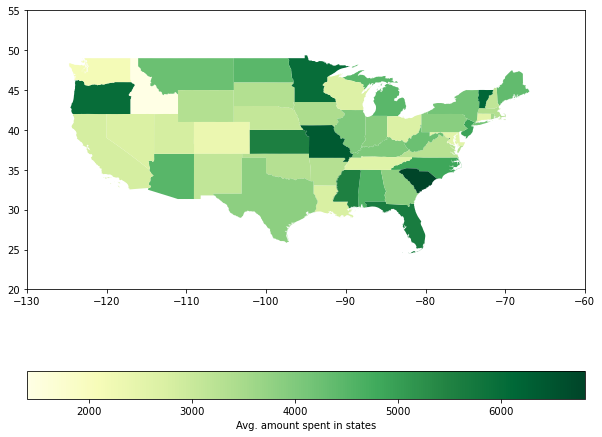

In [77]:
states_and_spent_list = []

for i in list_shortcut_states:
    state_rows = data_mixed.loc[data_mixed["State"] == i]

    state_spent = state_rows["Yearly Amount Spent"].sum()

    states_and_spent_list.append(state_spent)

#print(states_and_spent_list)
#print(usa.head())


states_and_spent_list = gpd.GeoDataFrame(states_and_spent_list)

#print(states_and_spent_list.head())

usa_spent = pd.concat([usa, states_and_spent_list], axis=1)
usa_spent.columns = ["STATEFP","STATENS","AFFGEOID","GEOID","STUSPS","NAME","LSAD","ALAND","AWATER","geometry","Customers","Avg. Amount Spent"]
#print(usa_spent.head())

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot()
plt.xlim(-130, -60)
plt.ylim(20,55)
usa_spent.plot(column="Avg. Amount Spent",ax=ax, legend= True, cmap="YlGn", legend_kwds = {"label": "Avg. amount spent in states", "orientation":"horizontal"})

Creating new customer groups for clustering 

In [78]:
state_group_list = []

for i in data_mixed["State"]:
    # 12 - 10
    if i in (["MO","DE","SC","OR","VT","FL","MS","MN","KS","NJ","NC"]):
        state_group_list.append("HIGH")
    # 9 - 8
    if i in (["AZ","HI","AL","MI","WV","ME","ND","NY","IL","TX","PA","GA","KY","MT"]):
        state_group_list.append("MEDIUM")
    # 7 - 0
    if i in (["MA","OK","WY","IN","IA","SD","AK","NH","RI","CA","NV","NE","VA","LA","NM","AR","WI","OH","CT","MD","CO","TN","UT","WA","ID"]):
        state_group_list.append("LOW")

state_group_series_new = pd.Series(state_group_list)

data_mixed_new = pd.concat([data_mixed, state_group_series_new], axis=1)



data_mixed_new.columns = ["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","State","State group"]

print(data_mixed_new.head(5))

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            34.305557    13.717514        36.721283              3.120179   
3            33.871038    12.026925        34.476878              5.493507   
4            32.021596    11.366348        36.683776              4.685017   

   Yearly Amount Spent State State group  
0           587.951054    MI      MEDIUM  
1           392.204933    CA         LOW  
2           581.852344    OH         LOW  
3           637.102448    MN        HIGH  
4           521.572175    WV      MEDIUM  


One-hot encoding

In [81]:
hot_states = pd.get_dummies(data_mixed_new["State group"])
#print(hot_states.head(5))

data_hot_clustering = pd.concat([data_mixed_new,hot_states], axis=1)
display(data_hot_clustering.head(5))

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            34.305557    13.717514        36.721283              3.120179   
3            33.871038    12.026925        34.476878              5.493507   
4            32.021596    11.366348        36.683776              4.685017   

   Yearly Amount Spent State State group  HIGH  LOW  MEDIUM  
0           587.951054    MI      MEDIUM     0    0       1  
1           392.204933    CA         LOW     0    1       0  
2           581.852344    OH         LOW     0    1       0  
3           637.102448    MN        HIGH     1    0       0  
4           521.572175    WV      MEDIUM     0    0       1

Email analysis

In [123]:
email_tail_list = []
email_series = data["Email"]

for i in email_series:
    head, sep, tail = i.partition("@")
    email_tail_list.append(tail)

email_tail_series = pd.Series(email_tail_list)

tail_cat_list = []

for i in email_tail_list:
    if i == "gmail.com":
        tail_cat_list.append(1)
    elif i == "hotmail.com":
        tail_cat_list.append(2)
    elif i == "yahoo.com":
        tail_cat_list.append(3)
    else:
        tail_cat_list.append(4)

email_new = pd.Series(tail_cat_list)

#print(email_new.head(15))
print(email_new.value_counts())

4    250
1     87
2     87
3     76
dtype: int64


Avatar analysis

In [113]:
data["Avatar"].nunique()

138

States and numerical variables

In [114]:
# states with high customer numbers and yearly amount spent
high = data_hot_clustering.loc[data_hot_clustering["HIGH"] == 1]
display(high.describe())

# states with medium customer numbers and yearly amount spent
medium = data_hot_clustering.loc[data_hot_clustering["MEDIUM"] == 1]
#print(medium.describe())

# states with low customer numbers and yearly amount spent
low = data_hot_clustering.loc[data_hot_clustering["LOW"] == 1]
#print(low.describe())

Avg. Session Length  Time on App  Time on Website  \
count           127.000000   127.000000       127.000000   
mean             33.133486    12.027540        37.058198   
std               1.057492     0.954973         0.969986   
min              29.532429     9.953995        34.476878   
25%              32.434886    11.309654        36.518517   
50%              33.128693    11.971751        37.067090   
75%              33.753971    12.706892        37.688883   
max              35.860237    14.121784        39.294043   

       Length of Membership  Yearly Amount Spent   HIGH    LOW  MEDIUM  
count            127.000000           127.000000  127.0  127.0   127.0  
mean               3.653500           508.528323    1.0    0.0     0.0  
std                0.996474            79.807944    0.0    0.0     0.0  
min                0.269901           275.918421    1.0    0.0     0.0  
25%                2.987614           446.949922    1.0    0.0     0.0  
50%                3.605934           506.423860    1.0    0.0     0.0  
75%                4.241055           556.215028    1.0    0.0     0.0  
max                6.401229           708.935185    1.0    0.0     0.0

Correlations

pearson == 1 (perfect positive linear)

In [121]:
print(round(data_hot_clustering["Avg. Session Length"].corr(data_hot_clustering["Yearly Amount Spent"], method="pearson"), ndigits = 3),"Avg. Session Length - Yearly Amount Spent")

print(round(data_hot_clustering["Time on App"].corr(data_hot_clustering["Yearly Amount Spent"], method="pearson"), ndigits=3),"Time on App - Yearly Amount Spent")

print(round(data_hot_clustering["Length of Membership"].corr(data_hot_clustering["Yearly Amount Spent"], method="pearson"), ndigits=3),"Length of Membership - Yearly Amount Spent")

0.356 Avg. Session Length - Yearly Amount Spent
0.512 Time on App - Yearly Amount Spent
0.8 Length of Membership - Yearly Amount Spent


In [122]:
table = pd.pivot_table(data_hot_clustering, index=["State group"], values=["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"], aggfunc=np.mean)
display(table)

Avg. Session Length  Length of Membership  Time on App  \
State group                                                           
HIGH                   33.133486              3.653500    12.027540   
LOW                    33.018810              3.535615    12.098547   
MEDIUM                 33.038120              3.552508    11.968194   

             Time on Website  Yearly Amount Spent  
State group                                        
HIGH               37.058198           508.528323  
LOW                36.907439           500.631768  
MEDIUM             37.110169           497.306217